In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import glob

### Plotting the neutrino events distribution

In [2]:
# Importing IceCube data from 2008-2018 already corrected for double counting 
# data sets used: (i) IC40, (ii) IC59, (iii) IC79, (iv) IC86-I and (v) IC86-II to IC86-VII

combined_data = glob.glob("Data/IceCube 2008-2018 double counting corrected/*.csv")

for data_file in combined_data:
    data = pd.read_csv(data_file, sep=r'\s+')
    try:
        all_data = pd.concat([all_data, data], ignore_index=True)
    except NameError:
        all_data = data

In [3]:
all_data

,#,MJD[days],log10(E/GeV),AngErr[deg],RA[deg],Dec[deg],Azimuth[deg],Zenith[deg]
0,54562.379113,3.31,0.48,203.024,16.760,218.374,106.712,NaN
1,54562.386622,5.17,0.62,75.024,-13.371,349.100,76.646,NaN
2,54562.387892,3.92,0.56,97.501,11.290,327.060,101.291,NaN
3,54562.392677,5.57,1.13,305.857,-33.932,120.413,56.090,NaN
4,54562.404776,5.80,1.11,143.516,-38.279,287.171,51.684,NaN
...,...,...,...,...,...,...,...,...
1134426,58307.961110,5.14,0.20,221.246,-59.959,141.239,29.956,NaN
1134427,58307.962666,2.94,1.23,191.547,4.415,171.627,94.312,NaN
1134428,58307.963556,2.88,0.30,308.127,42.543,55.437,132.606,NaN
1134429,58307.963972,2.98,0.21,332.199,44.720,31.489,134.811,NaN


In [4]:
# All the columns are shifted one to the right, so need to 
# correct for that

logE = np.array(all_data['MJD[days]'])
RA = np.array(all_data['AngErr[deg]'])
Dec = np.array(all_data['RA[deg]'])

# # Since RA is given in [0, 360] degrees, need to convert to [-180, 180] degrees
# for i in range(len(RA)):
#     if RA[i] > 180:
#         RA[i] = RA[i] - 360

In [5]:
# Creating a 2D grid to store the counts in each 1x1 degree bin

grid = np.zeros((360, 180))

for i in range(len(RA)):
    ra_idx = int(np.floor(RA[i]))
    if ra_idx == 360:
        ra_idx = 0
    dec_idx = int(np.floor(Dec[i] + 90))
    grid[ra_idx, dec_idx] += 1



In [6]:
# Generating the RA and Dec arrays for plotting
# RA: -179 -> 180, Dec: -90 -> 89

plot_RA = []

for i in range(0, 181):
    count = 0
    while count < 180:
        plot_RA.append(i)
        count += 1

for i in range(-179, 0):
    count = 0
    while count < 180:
        plot_RA.append(i)
        count += 1

plot_RA = np.array(plot_RA) # RA: [0, 1, ..., 180, -179, -178, ..., -1]


plot_Dec = []

count = 0
while count < 360:
    for i in range(-90, 90):
        plot_Dec.append(i)
    count += 1

plot_Dec = np.array(plot_Dec) # Dec: [-90, -89, ..., 89]

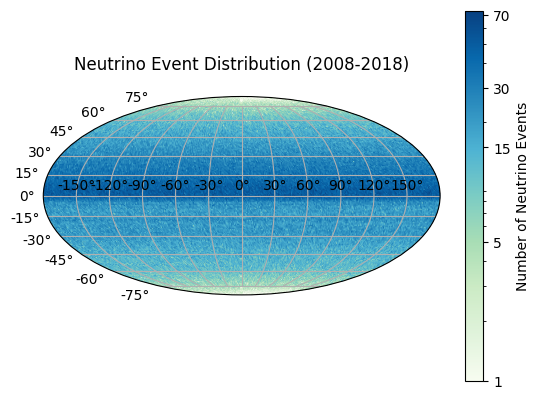

In [7]:
# Plotting a skymap 

plt.figure()
plt.subplot(projection='mollweide')
plt.scatter(np.radians(plot_RA), np.radians(plot_Dec), c=grid.flatten(), cmap='GnBu', s=1, norm='log')
plt.grid(True)
plt.title('Neutrino Event Distribution (2008-2018)', pad=20)

plt.colorbar(label='Number of Neutrino Events').set_ticks([1, 5, 15, 30, 70], labels=['1', '5', '15', '30', '70'])

plt.show()

### Adding the galaxy mergers data

In [68]:
# Importing the galaxy mergers data set 

# J/ApJS/181/233 - Hwang and Chang (2009) - only type M
galx_1 = pd.read_csv("Data/galaxy mergers cat/1_ApJS_181_233.csv")

# J/AJ/130/2043 - Patton et al. (2005) - only GinP
galx_3 = pd.read_csv("Data/galaxy mergers cat/3_AJ_130_2043.csv")

# J/AJ/128/62 - Gimeno et al. (2004) 
galx_4 = pd.read_csv("Data/galaxy mergers cat/4_AJ_128_62.csv")

# MNRAS/388/1537 - Mcintosh et al. (2008) - only central mergers
galx_6 = pd.read_csv("Data/galaxy mergers cat/6_MNRAS_388_1537.csv")

In [28]:
# Defining functions to convert RA and Dec to radians for plotting

# Converting RA from hh mm ss.s (in str) to radians

def ra_to_rad(RA):
    
    for i in range(len(RA)):
    
        # splitting the RA string and converting to deg
        ra_str = RA[i].split()
        ra_deg = float(ra_str[0]) * 15 + float(ra_str[1]) * 15 / 60 + float(ra_str[2]) * 15 / 3600 
        
        # converting to [-180, 180] degrees
        if ra_deg > 180:
            ra_deg = ra_deg - 360
        
        # converting to radians
        ra_rad = np.radians(ra_deg)
        RA[i] = ra_rad

    return RA


# Converting Dec from dd mm ss.s (in str) to degrees

def dec_to_rad(Dec):

    for i in range(len(Dec)):

        # similarly, splitting the Dec string and converting to deg
        dec_str = Dec[i].split()
        dec_deg = float(dec_str[0]) + float(dec_str[1]) / 60 + float(dec_str[2]) / 3600
        
        # converting to radians
        dec_rad = np.radians(dec_deg)
        Dec[i] = dec_rad
    
    return Dec

In [72]:
# Importing the RA and Dec columns

RA_1 = ra_to_rad(np.array(galx_1['RAJ2000'])) # in rad (from hh mm ss.s)
Dec_1 = dec_to_rad(np.array(galx_1['DEJ2000'])) # in rad (from dd mm ss.s)

RA_3 = ra_to_rad(np.array(galx_3['RAJ2000'])[::2]) # skipping every second entry since 
Dec_3 = dec_to_rad(np.array(galx_3['DEJ2000'])[::2]) # they are the other galaxy in the pair

RA_4 = np.array(galx_4['RA']) # in deg
for i in range(len(RA_4)): # converting from [0, 360] to [-180, 180] deg
    if RA_4[i] > 180:
        RA_4[i] = RA_4[i] - 360
RA_4 = np.radians(RA_4) # in rad (from deg)
Dec_4 = np.radians(np.array(galx_4['Dec'])) # in rad (from deg)

RA_6 = ra_to_rad(np.array(galx_6[:21]['RAJ2000']))  # we need only the first 21 entries 
Dec_6 = dec_to_rad(np.array(galx_6[:21]['DEJ2000']))

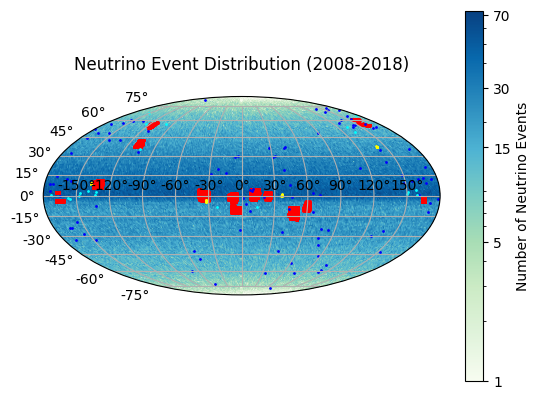

In [76]:
# Plotting the galaxy mergers on top of the neutrino event distribution skymap 

plt.figure()
plt.subplot(projection='mollweide')
plt.scatter(np.radians(plot_RA), np.radians(plot_Dec), c=grid.flatten(), cmap='GnBu', s=1, norm='log')
plt.grid(True)
plt.colorbar(label='Number of Neutrino Events').set_ticks([1, 5, 15, 30, 70], labels=['1', '5', '15', '30', '70'])

# plotting the galaxy mergers
plt.scatter(RA_1, Dec_1, c='red', s=1, label='Galaxy Mergers (Type M)')
plt.scatter(RA_3, Dec_3, c='yellow', s=1, label='Galaxy Mergers (Patton et al. 2005)')
plt.scatter(RA_4, Dec_4, c='blue', s=1, label='Galaxy Mergers (Gimeno et al. 2004)')
plt.scatter(RA_6, Dec_6, c='cyan', s=1, label='Galaxy Mergers (Mcintosh et al. 2008)')

plt.title('Neutrino Event Distribution (2008-2018)', pad=20)
plt.show()